In [190]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
f = open('smsspamcollection\SMSSpamCollection.txt', 'r', encoding='UTF-8')
lines = []
for line in f:
    lines.append(line[:-1].split('\t'))

In [59]:
data = pd.DataFrame(lines, columns=['class', 'text'])

In [211]:
# from sklearn.datasets import fetch_20newsgroups
# news = fetch_20newsgroups()

# news_group_data = news.data
# news_group_target_names = news.target_names
# news_group_target = news.target


SyntaxError: invalid syntax (<ipython-input-211-0d6348bb2ebd>, line 1)

In [5]:
# data = pd.DataFrame({'text': news_group_data, 
#                         'class': news_group_target})

In [60]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Гистограмма длин текстов

(array([1.165e+03, 1.657e+03, 8.570e+02, 5.190e+02, 7.030e+02, 5.370e+02,
        4.000e+01, 2.400e+01, 1.200e+01, 2.100e+01, 1.400e+01, 2.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.        ,  32.26666667,  62.53333333,  92.8       ,
        123.06666667, 153.33333333, 183.6       , 213.86666667,
        244.13333333, 274.4       , 304.66666667, 334.93333333,
        365.2       , 395.46666667, 425.73333333, 456.        ,
        486.26666667, 516.53333333, 546.8       , 577.06666667,
        607.33333333, 637.6       , 667.86666667, 698.13333333,
        728.4       , 758.66666667, 788.93333333, 819.2       ,
        849.46666667, 879.73333333, 910.        ]),
 <BarContainer object of 30 artists>)

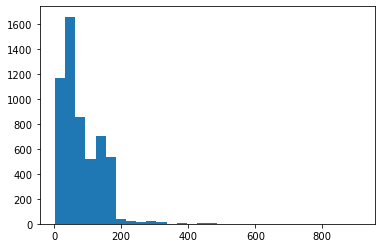

In [61]:
plt.hist(data['text'].apply(len), bins = 30)

In [90]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    " u ": ' you ',
    ' ur ': ' your ',
    'm8': 'mate',
    'smb':'somebody',
    'smth': 'something',
    'smh': 'somehow',
    ' ü ': ' you ',
    ' lt ': 'love that',
    ' gt ': 'get through'
    }

In [85]:
def expand_match(contraction):
    match = contraction.group(0)
    expanded_contraction = cs_dict.get(match) if cs_dict.get(match) else cs_dict.get(match.lower())
    return expanded_contraction


def expand_contractions(text, cs_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(cs_dict.keys())), flags=re.IGNORECASE | re.DOTALL)


    expanded_text = contractions_pattern.sub(expand_match, text)

#     expanded_text = re.sub('\W', " ", expanded_text)
#     expanded_text = re.sub('\s+[a-zA-Z]\s+', "", expanded_text)
    return expanded_text

In [86]:
lemmatizer = WordNetLemmatizer()
train_path = 'aclImdb/train'
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [212]:
def text_prep(text):
    new_text = text.lower()
    new_text = text.lower()
    new_text = re.sub('<[^<]+?>', '', new_text)
    new_text = re.sub('[<>]', '', new_text)
    new_text = re.sub('\d', ' num ', new_text)
    new_text = re.sub("'", "", new_text)
    new_text = re.sub('"', "", new_text)
    new_text = re.sub('[._*:;,-=$&]', " ", new_text)
    new_text = re.sub('\s+', " ", new_text)
    new_text = expand_contractions(new_text,contractions_dict)
    words = nltk.word_tokenize(new_text)
    words = [stemmer.stem(word) for word in words]
    lemma_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return lemma_words


In [213]:
data['lemma_text'] = data['text'].apply(text_prep)

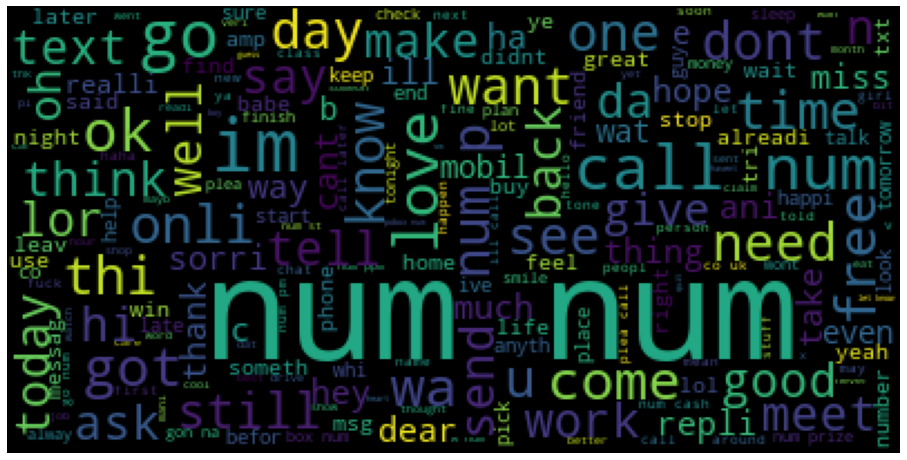

In [214]:
wcloud = ' '.join(data['lemma_text'].apply(lambda x: ' '.join(x)))
wordcloud = WordCloud().generate(wcloud)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Stopwords попадают в выборку и появляются часто, потому что являеются сокращениями 

TODO:
Расширить список стоп слов или заменить сокращения на полную версию слова (done)

## Doc2vec

In [215]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['lemma_text'])]

In [216]:
documents

[TaggedDocument(words=['go', 'jurong', 'point', 'crazi', 'avail', 'onli', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], tags=[0]),
 TaggedDocument(words=['ok', 'lar', 'joke', 'wif', 'oni'], tags=[1]),
 TaggedDocument(words=['free', 'entri', 'num', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'num', 'num', 'st', 'may', 'num', 'num', 'num', 'num', 'text', 'fa', 'num', 'num', 'num', 'num', 'num', 'receiv', 'entri', 'question', '(', 'std', 'txt', 'rate', ')', 'c', 'appli', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num'], tags=[2]),
 TaggedDocument(words=['u', 'dun', 'say', 'earli', 'hor', 'c', 'alreadi', 'say'], tags=[3]),
 TaggedDocument(words=['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though'], tags=[4]),
 TaggedDocument(words=['freemsg', 'hey', 'darl', 'num', 'week', 'word', 'back', '!', 'id', 'like', 'fun', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chg', 'send', '£', 'num', 'num', 

In [217]:
data.text[1]

'Ok lar... Joking wif u oni...'

In [218]:
v_measures = {}
for i in range(100, 1600, 100):
    model = Doc2Vec(documents, vector_size=i, random_state=13)
    doc2vec_data_vectors = list(data['lemma_text'].apply(model.infer_vector))
    cluster_model = KMeans(n_clusters=2, random_state=13)
    cluster_model.fit(doc2vec_data_vectors)
    v_measures[i] = v_measure_score(data['class'], cluster_model.labels_)
    

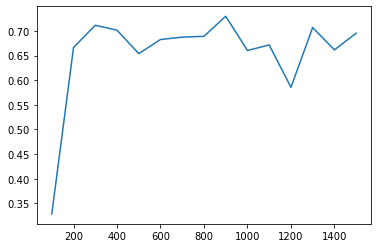

In [219]:
plt.plot(range(100, 1600, 100), v_measures.values())

In [220]:
v_measures

{100: 0.3285909359578075,
 200: 0.666442637715082,
 300: 0.7115383162388782,
 400: 0.7014418340774522,
 500: 0.6540162698649105,
 600: 0.6825995693952531,
 700: 0.6873761916335924,
 800: 0.6890890174327107,
 900: 0.7298187163591361,
 1000: 0.6602979652937612,
 1100: 0.6715503419124482,
 1200: 0.5855576407801705,
 1300: 0.7068752954689965,
 1400: 0.6615412843364269,
 1500: 0.6954403417287818}

In [221]:
model = Doc2Vec(documents, vector_size=900, random_state=13)
doc2vec_data_vectors = list(data['lemma_text'].apply(model.infer_vector))

<AxesSubplot:xlabel='x', ylabel='y'>

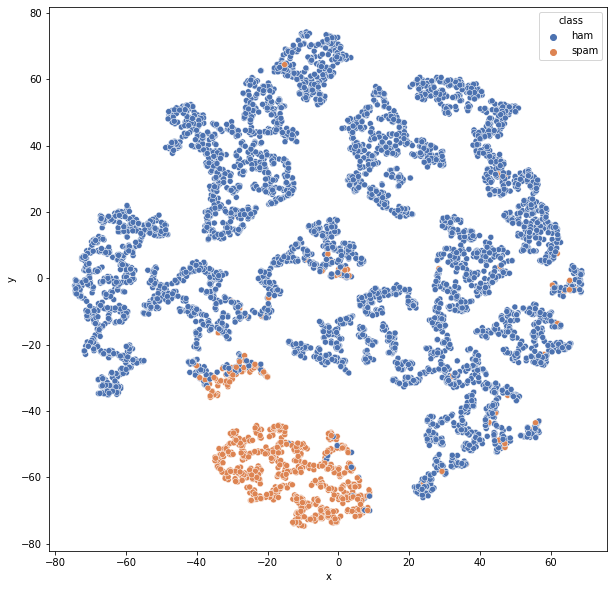

In [222]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2).fit_transform(doc2vec_data_vectors)
doc2vec_tsne = pd.DataFrame(data_embedded, columns=['x', 'y'])
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=data['class'], palette="deep")

## TF-IDF

In [223]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=2000)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_vectors.columns=vectorizer.get_feature_names()

In [224]:
data_vectors

,abiola,abl,abt,ac,accept,access,account,account statement,account statement num,account statement show,...,yesterday,yet,yiju,yo,yoga,youd,youll,youv,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
v_measures = {}
for i in range(500, 3000, 100):
    vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=i)
    data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
    data_vectors.columns=vectorizer.get_feature_names()
    cluster_model = KMeans(n_clusters=2, random_state=13)
    cluster_model.fit(data_vectors)
    v_measures[i] = v_measure_score(data['class'], cluster_model.labels_)

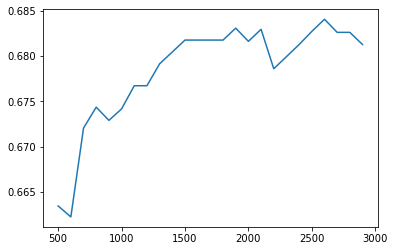

In [227]:
plt.plot(range(500, 3000, 100), v_measures.values())

In [228]:
v_measures

{500: 0.6634406736608097,
 600: 0.6622316165110399,
 700: 0.6720597263014345,
 800: 0.6743737371786415,
 900: 0.6729109485608221,
 1000: 0.6741821576499923,
 1100: 0.6767431322092886,
 1200: 0.6767431322092886,
 1300: 0.6791699271766244,
 1400: 0.6804787099639559,
 1500: 0.681794129491297,
 1600: 0.681794129491297,
 1700: 0.681794129491297,
 1800: 0.681794129491297,
 1900: 0.6831162716726086,
 2000: 0.6816562900582871,
 2100: 0.6829847080558903,
 2200: 0.6786257141192358,
 2300: 0.6799594383461203,
 2400: 0.6813001662762816,
 2500: 0.6827505133471543,
 2600: 0.6840988677357928,
 2700: 0.6826479932688226,
 2800: 0.6826479932688226,
 2900: 0.6813001662762816}

<AxesSubplot:xlabel='x', ylabel='y'>

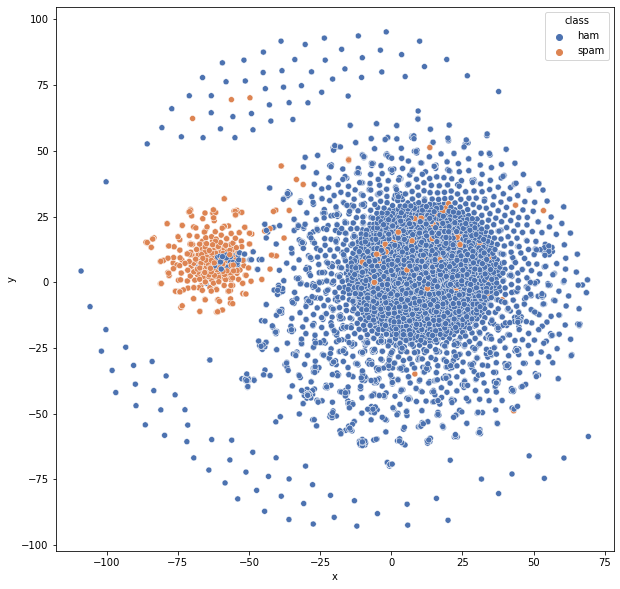

In [229]:
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA, DictionaryLearning, FastICA
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=2600)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_embedded = TSNE(n_components=2).fit_transform(data_vectors)
tfidf_tmp = pd.DataFrame(data_embedded, columns=['x', 'y'])
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=tfidf_tmp, x='x', y='y', hue=data['class'], palette="deep")

## Kmeans

In [230]:
from sklearn.cluster import KMeans

In [231]:
cluster_model = KMeans(n_clusters=2, random_state=13)
cluster_model.fit(doc2vec_data_vectors)

KMeans(n_clusters=2, random_state=13)

<AxesSubplot:title={'center':'Real clusters'}, xlabel='x', ylabel='y'>

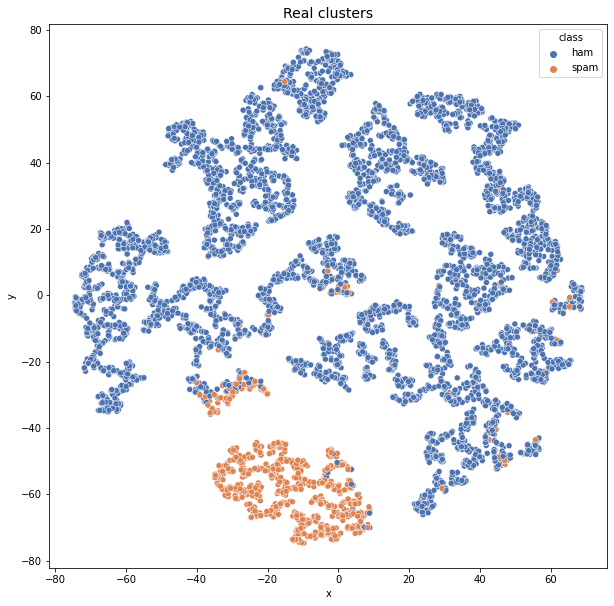

In [286]:
fig = plt.figure(figsize=(10,10))
plt.title('Real clusters')
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=data['class'], palette="deep")

<AxesSubplot:title={'center':'Predicted clusters'}, xlabel='x', ylabel='y'>

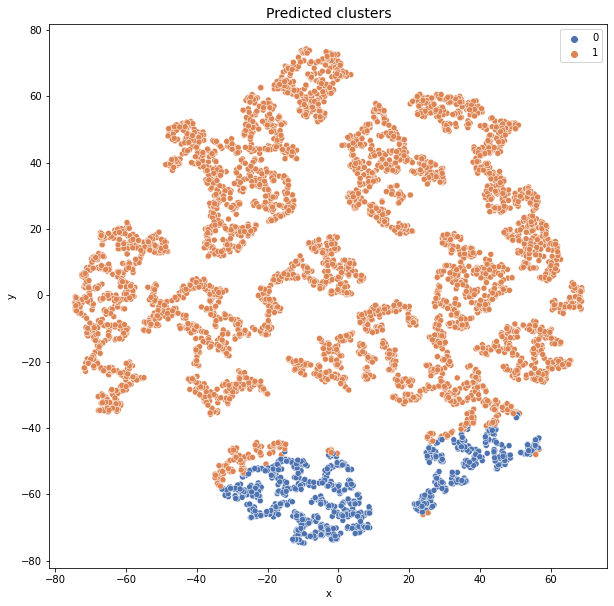

In [285]:
fig = plt.figure(figsize=(10,10))
plt.title('Predicted clusters')
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")

In [234]:
from sklearn.metrics import silhouette_score, v_measure_score

print('Kmeans, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Kmeans, silhouette_score', silhouette_score(doc2vec_data_vectors, cluster_model.labels_))


Kmeans, v measure 0.7170353984527358
Kmeans, silhouette_score 0.596632


In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
params ={'max_iter': range(100, 500, 50),
'tol': [1e-4, 1e-3, 1e-2]}

clst = GridSearchCV(cluster_model, params)

In [237]:
clst.fit(doc2vec_data_vectors)

GridSearchCV(estimator=KMeans(n_clusters=2, random_state=13),
             param_grid={'max_iter': range(100, 500, 50),
                         'tol': [0.0001, 0.001, 0.01]})

In [238]:
clst.best_params_

{'max_iter': 100, 'tol': 0.0001}

In [240]:
print('Kmeans, v measure', v_measure_score(data['class'], clst.estimator.labels_))
print('Kmeans, silhouette_score', silhouette_score(doc2vec_data_vectors, clst.estimator.labels_))

Kmeans, v measure 0.7170353984527358
Kmeans, silhouette_score 0.596632


## Evaluating number of clusters

In [246]:
from clusteval import clusteval

ce = clusteval(method='silhouette')
results= ce.fit(np.array(doc2vec_data_vectors))


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:26<00:00,  1.15s/it]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


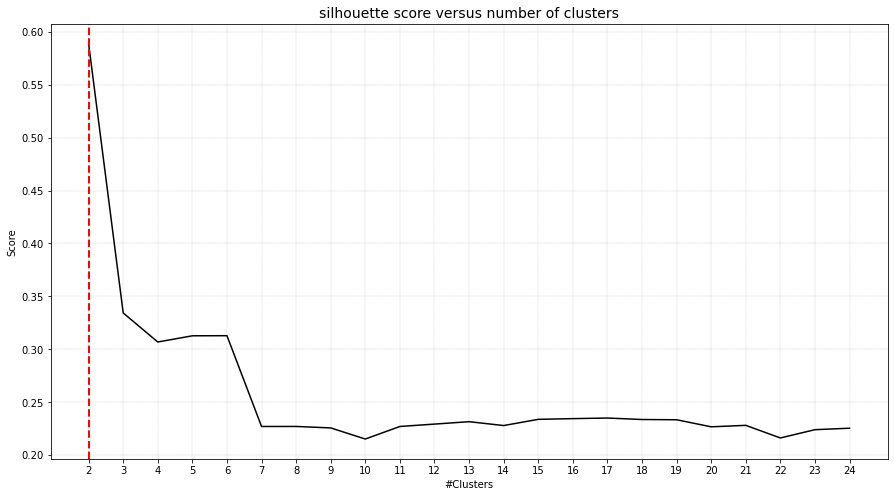

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'silhouette score versus number of clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [247]:
ce.plot()

## MiniBatch KMeans

Оптимальное количество кластеров через метод силуэта: 2

In [291]:
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans

In [298]:
cluster_model = MiniBatchKMeans(n_clusters=2, random_state=13)
cluster_model.fit(doc2vec_data_vectors)
print('Mini Batch, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Mini Batch, silhouette_score', silhouette_score(doc2vec_data_vectors, cluster_model.labels_))

Mini Batch, v measure 0.48058677932183413
Mini Batch, silhouette_score 0.5659453


<AxesSubplot:xlabel='x', ylabel='y'>

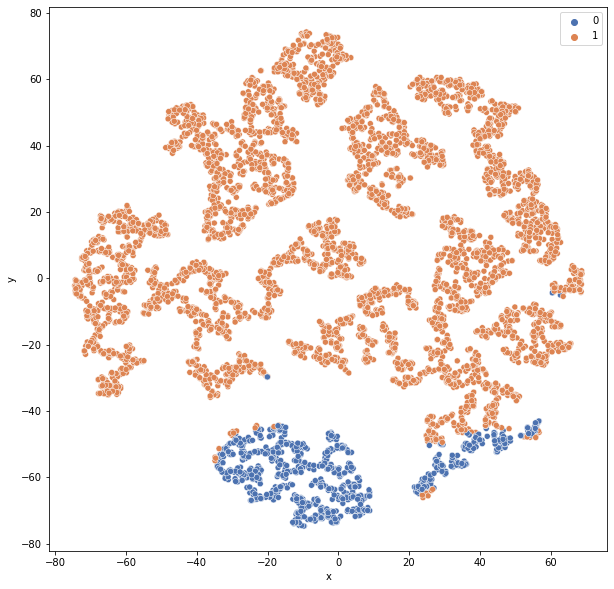

In [299]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")

In [300]:
params ={'max_iter': range(100, 500, 50),
'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e1],
'batch_size': range(50, 1000, 50)}

clst = GridSearchCV(cluster_model, params)
clst.fit(doc2vec_data_vectors)
clst.best_params_

{'batch_size': 800, 'max_iter': 100, 'tol': 1e-05}

In [301]:
print('Kmeans, v measure', v_measure_score(data['class'], clst.estimator.labels_))
print('Kmeans, silhouette_score', silhouette_score(doc2vec_data_vectors, clst.estimator.labels_))

Kmeans, v measure 0.48058677932183413
Kmeans, silhouette_score 0.5659453


<AxesSubplot:xlabel='x', ylabel='y'>

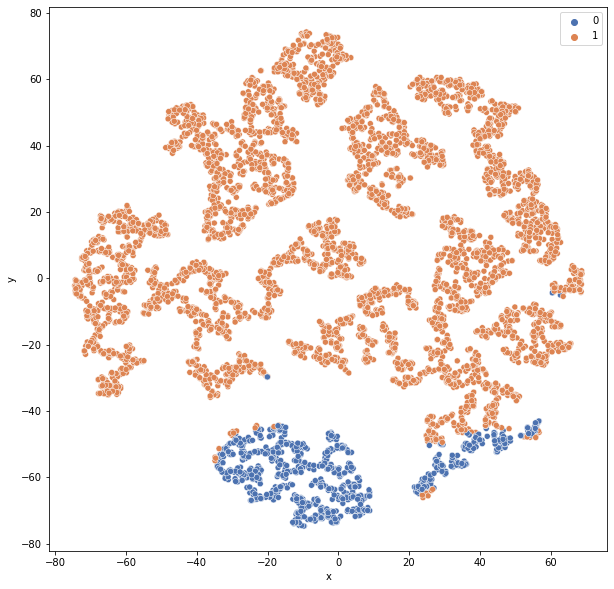

In [302]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=clst.estimator.labels_, palette="deep")

## AgglomerativeClustering

In [306]:
cluster_model = AgglomerativeClustering(n_clusters=2)
cluster_model.fit(doc2vec_data_vectors)
print('Mini Batch, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Mini Batch, silhouette_score', silhouette_score(doc2vec_data_vectors, cluster_model.labels_))

Mini Batch, v measure 0.6837541374048719
Mini Batch, silhouette_score 0.58879423


<AxesSubplot:title={'center':'Real clusters'}, xlabel='x', ylabel='y'>

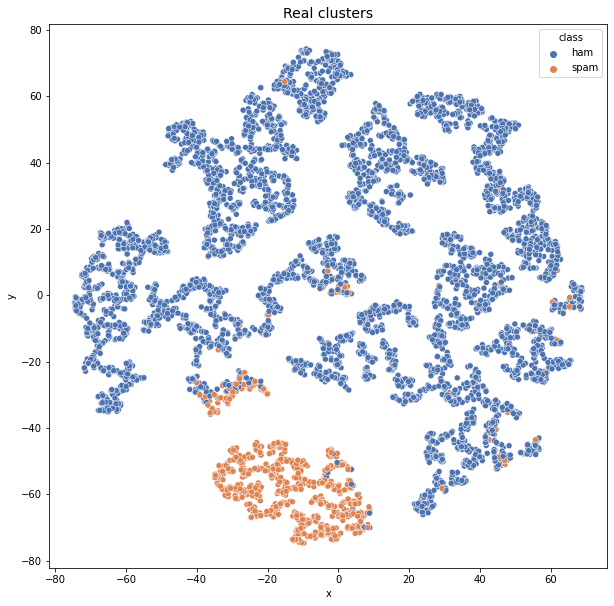

In [307]:
fig = plt.figure(figsize=(10,10))
plt.title('Real clusters')
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=data['class'], palette="deep")

<AxesSubplot:title={'center':'Model clusters'}, xlabel='x', ylabel='y'>

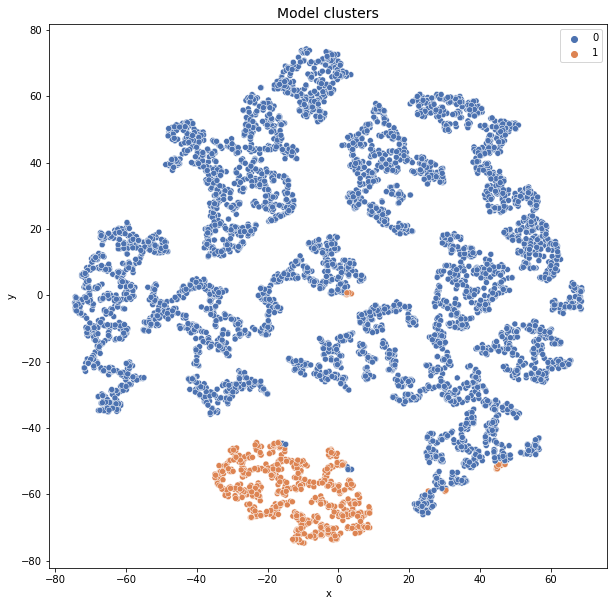

In [308]:
fig = plt.figure(figsize=(10,10))
plt.title('Model clusters')
sns.scatterplot(data=doc2vec_tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")